Test persoon: 621e346f67b776a24081744f

In [59]:
from pymongo import MongoClient
from bson import ObjectId
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
client = MongoClient("mongodb://localhost:27017/")
	
db = client["lifesnaps"]
collection = db["fitbit"]

person = "621e2f9167b776a240011ccb"

query = {
    "id": ObjectId(person),
    "type": "sleep"
}

doc = collection.find(query)
for doc in collection.find(query):
    print(doc)

In [ ]:
# TEST

minutes_sleep = doc["data"]["minutesAsleep"]
hours = minutes_sleep / 60
print(f"Sleep in one night: {minutes_sleep} min ({hours:.2f} hours)")

Sleep in one night: 446 min (7.43 hours)


In [ ]:
# DIT STUKJE CODE MAG WEG, WAS EEN TEST

summary = doc['data']['levels']['summary']
for stage in ['deep', 'light', 'rem']:
    mins = summary[stage]['minutes']
    hrs  = mins / 60
    print(f"{stage.capitalize():<5}: {mins} min ({hrs:.2f} h)")

KeyError: 'deep'

In [65]:
records = []

for doc in collection.find(query):
    try:
        total_sleep = doc["data"]["minutesAsleep"]/60
        deep = doc["data"]["levels"]["summary"]["deep"]["minutes"] / 60
        light = doc["data"]["levels"]["summary"]["light"]["minutes"] / 60
        rem = doc["data"]["levels"]["summary"]["rem"]["minutes"] / 60
        date = doc["data"]["dateOfSleep"]
        records.append({"date:": date, "total_sleep": total_sleep, "light": light, "deep": deep,"rem": rem})
        df = pd.DataFrame(records)
    except:
        print("foutje")

foutje
foutje
foutje
foutje
foutje
foutje
foutje


In [67]:
df

,date:,total_sleep,light,deep,rem
0,2021-11-18,6.216667,3.933333,1.166667,1.116667
1,2021-11-12,5.966667,3.500000,0.866667,1.600000
2,2021-11-03,6.083333,3.650000,0.583333,1.850000
3,2021-10-27,5.033333,2.783333,0.833333,1.416667
4,2021-10-24,8.750000,5.666667,1.066667,2.016667
...,...,...,...,...,...
84,2022-01-07,6.450000,3.783333,1.000000,1.666667
85,2022-01-04,8.016667,4.200000,1.766667,2.050000
86,2021-12-30,6.483333,4.066667,0.616667,1.800000
87,2021-12-27,7.600000,4.650000,1.283333,1.666667


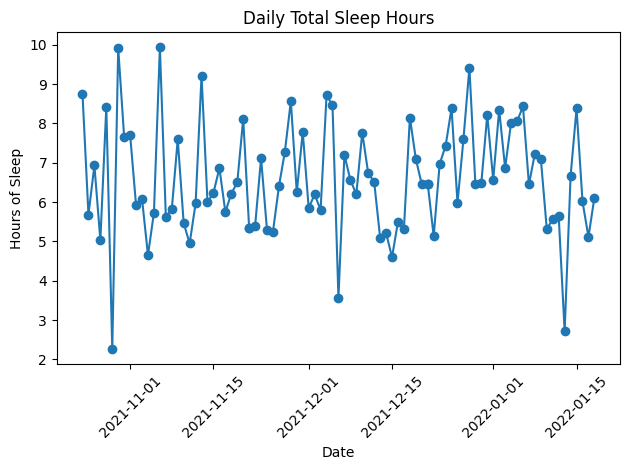

In [ ]:
df['date'] = pd.to_datetime(df['date:'])
df.set_index('date', inplace=True)
df = df.sort_index() 

plt.figure()
plt.plot(df.index, df['total_sleep'], marker='o', linestyle='-')
plt.title("Daily Total Sleep Hours")
plt.xlabel("Date")
plt.ylabel("Hours of Sleep")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from pymongo import MongoClient
from bson import ObjectId
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd

def analyze_monthly_sleep(user_id_str, year, month):
    """
    Connects to MongoDB, fetches all 'sleep' docs for the given user/month,
    computes daily sleep hours, prints averages, and plots the routine.
    """
    # ——— Connect & parameterize ———
    client = MongoClient("mongodb://localhost:27017/")
    db = client["lifesnaps"]
    collection = db["fitbit"]

    user_id = ObjectId(user_id_str)
    start = pd.Timestamp(year, month, 1)
    end   = start + MonthEnd(0)

    # ——— Query sleep docs for that month ———
    cursor = collection.find({
        "id": user_id,
        "type": "sleep",
        "data.dateOfSleep": {
            "$gte": start.strftime("%Y-%m-%d"),
            "$lte": end.strftime("%Y-%m-%d")
        }
    })

    # ——— Build daily DataFrame ———
    records = []
    for doc in cursor:
        date = pd.to_datetime(doc['data']['dateOfSleep'])
        mins = doc['data']['minutesAsleep']
        records.append({"date": date, "sleep_hours": mins / 60})

    df = pd.DataFrame(records)
    if df.empty:
        print("No sleep records found for that month.")
        return

    df.set_index('date', inplace=True)
    df = df.sort_index()

    # ——— Show daily values ———
    print("\nDaily sleep hours:")
    print(df)

    # ——— Compute & print averages ———
    monthly_avg = df['sleep_hours'].mean()
    print(f"\nAverage sleep hours in {start.strftime('%B %Y')}: {monthly_avg:.2f} h")

    weekly_avg = df['sleep_hours'].resample('W').mean()
    print("\nWeekly average sleep hours:")
    print(weekly_avg.to_frame(name='sleep_hours'))

    # ——— Plot the routine ———
    plt.figure()
    plt.plot(df.index, df['sleep_hours'])
    plt.title(f"Daily Sleep Hours ({start.strftime('%B %Y')})")
    plt.xlabel("Date")
    plt.ylabel("Sleep Hours")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Example usage:
    analyze_monthly_sleep(
        user_id_str="621e346f67b776a24081744f",  # replace with your user ObjectId
        year=2021,
        month=6
    )
    
df.head()
